<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool_05_Linux/blob/main/Linux04_Docker_Command.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Docker 기본명령어

>## 1) 기본세팅

In [ ]:
sudo apt-get update 
sudo apt-get upgrade 

sudo apt-get install \ 
    apt-transport-https \ 
    ca-certificates \ 
    curl \ 
    gnupg \ 
    lsb-release 

curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /usr/share/keyrings/docker-archive-keyring.gpg 

echo \ 
  "deb [arch=amd64 signed-by=/usr/share/keyrings/docker-archive-keyring.gpg] https://download.docker.com/linux/ubuntu \ 
  $(lsb_release -cs) stable" | sudo tee /etc/apt/sources.list.d/docker.list > /dev/null 

sudo apt-get update 
sudo apt-get install docker-ce docker-ce-cli containerd.io 

>## 2) 기본명령어
- 필요한 경우 구글링 할 수 있을 정도면 충분함

>>### (1) From
- 도커파일이 베이스 이미지로 어떤 이미지를 사용할 것인지 명시하는 명령

In [ ]:
FROM ubuntu
FROM ubuntu:18.04
FROM nginx:latest AS ngx

>>### (2) Copy
- <scr> 파일, 디렉토리를 <dest> 경로에 복사함

In [ ]:
COPY a.tst /some-directory/b.txt
COPY my-directory /some-directory-2

>>### (3) Run
- 명시한 커맨트를 도커 컨테이너에서 실행함

In [ ]:
RUN 명령어

RUN pip install torch
RUN pip install -r requirements.txt

>>### (4) CMD
- 명시한 커맨드를 도커 컨테이너에서 실행하는 것을 명시하는 명령어



In [ ]:
CMD 명령어
CMD 인자1 인자2

CMD python main.py

>>### (5) WORKDIR 
- 이후 작성될 명령어를 컨테이너 내의 어떤 디렉토리에서 수행할 것인지를 명시함

In [ ]:
WORKDIR /path/to/workdit

WORKDIR /home/demo

>>### (6) POSE
- 컨테이너에서 뚫어줄 포트/프로토콜을 지정할 수 있음
- 프로토콜 지정안하면 TCP가 디폴트로 설정됨

In [ ]:
EXPOSE <port>
EXPOSE <port>/<protocol>

EXPSE 8080 

# 2. 실습

>## 1) VI 에디터에서 명령어 작성

In [ ]:
ssh 

In [ ]:
sudo apt-get update

In [ ]:
sudo apt-get upgrade

In [ ]:
sudo apt-get install apt-transport-https ca-certificates curl gnupg lsb-release

In [ ]:
sudo apt-get update
sudo apt-get install \
ca-certificates \
curl \
gnupg

In [ ]:
sudo install -m 0755 -d /etc/apt/keyrings
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /etc/apt/keyrings/docker.gpg
sudo chmod a+r /etc/apt/keyrings/docker.gpg

In [ ]:
sudo install -m 0755 -d /etc/apt/keyrings
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /etc/apt/keyrings/docker.gpg
sudo chmod a+r /etc/apt/keyrings/docker.gpg

In [ ]:
sudo apt-get update
sudo apt-get install docker-ce docker-ce-cli containerd.io docker-buildx-plugin docker-compose-plugin

In [ ]:
sudo docker run hello-world

In [ ]:
sudo usermod -a -G docker $USER

In [ ]:
sudo service docker restart

- vi test.txt 작성해서 실행

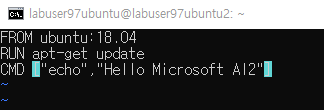

- :wq 엔터해서 저장

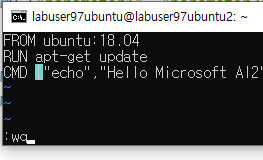

>## 2) 도커파일 생성

>>### (1) 로컬 도커 파일 참조해서 도커이미지(my-image v1.0.0) 만들기

In [ ]:
# 현재 경로
pwd

In [ ]:
cd $HOME

In [ ]:
# 폴더 만들고 이동
mkdir docker-practice
cd docker-practice

In [ ]:
# 파일 만들기
touch Dockerfile

In [ ]:
# 내용 확인
cat Dockerfile

In [ ]:
# Dockerfile 수정
vi Dockerfile

FROM ubuntu:18.04
RUN apt-get update
CMD ["echo","Hello Microsoft AI 2"]

cat Dockerfile

In [ ]:
docker build -t my-image:v1.0.0 . 
docker images

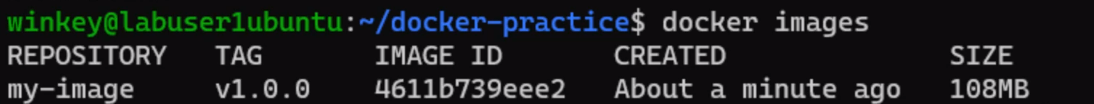

>## 3) 도커 이름 붙여서 실행

In [1]:
docker run --name demo1 my-image:v1.0.0

SyntaxError: ignored

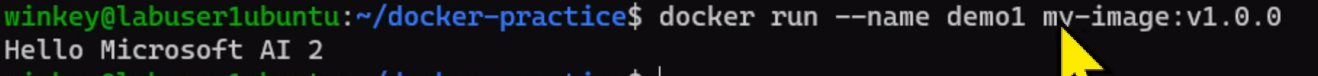

# 3. 도커 이동

>## 1) 레지스트리 이용 (폐쇄적환경)

- 포트 넘버 지정해서 레지스트리 생성

In [ ]:
docker run -d -p 5000:5000 --name registry 

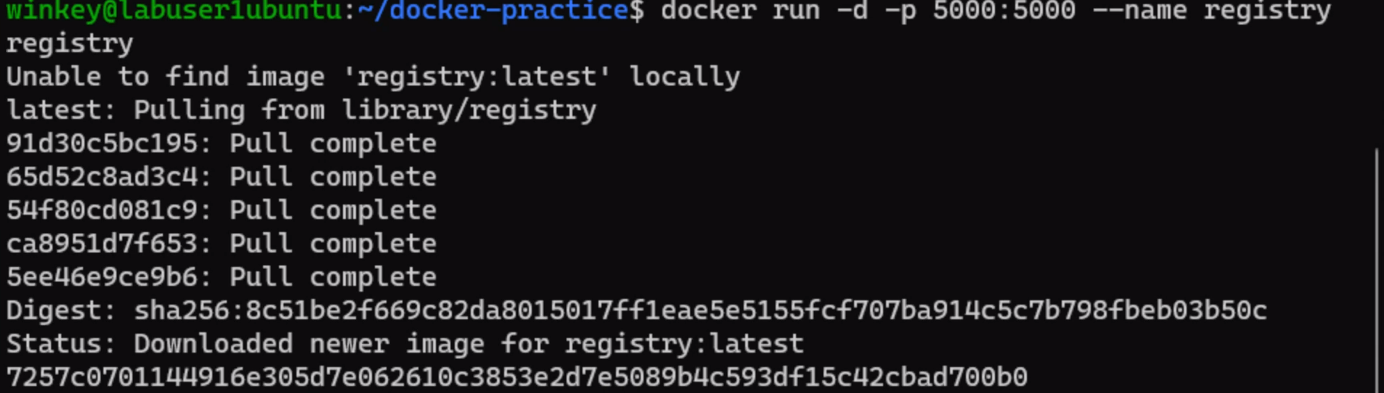

- 확인하기

In [ ]:
docker ps

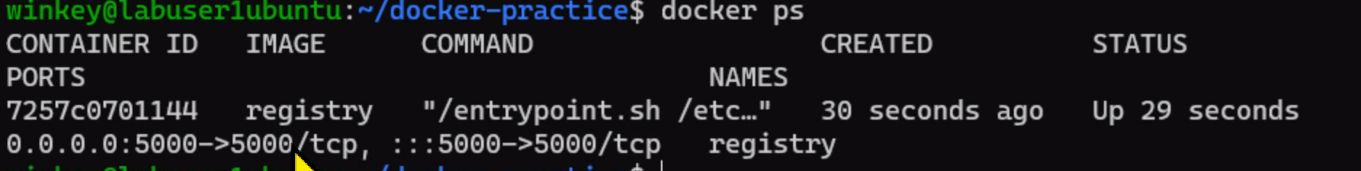

- 이미지 찾기

In [ ]:
docker images | grep my-image

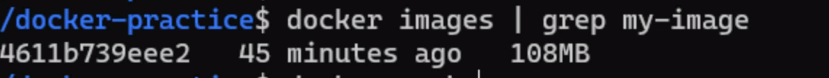

- 레지스트리에 이미지 넣기 (push)

In [ ]:
docker push localhost:5000/my-image:v1.0.0

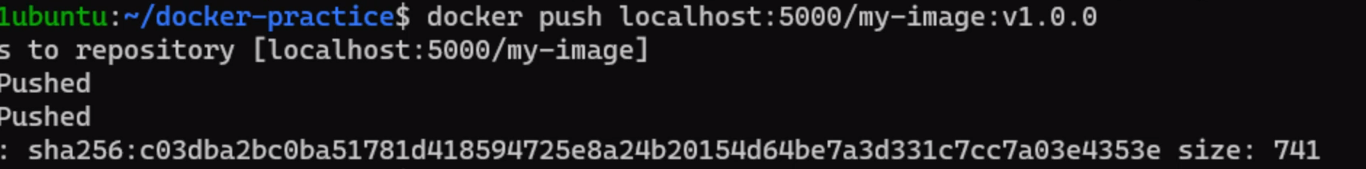

- 레지스트리에 올라간 이미지 목록 확인

In [ ]:
curl -X GET http://localhost:5000/v2/_catalog

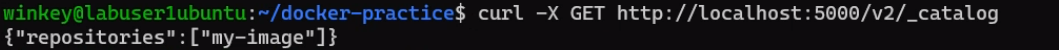

- 레지스트리에 올라간 이미지 태그 리스트(버전확인용)

In [ ]:
curl -X GET http://localhost:5000/v2/my-image/tags/list

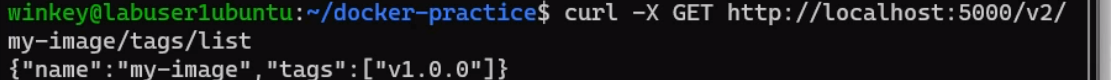

>## 2) Docker Hub 이용

- https://hub.docker.com/



- 리눅스에서 docker 설치할때 CLI(command line interface) 같이 설치했음

- 도커허브 로그인

In [ ]:
cd docker-prac

In [ ]:
docker login
# 이후에 ID, PW 입력

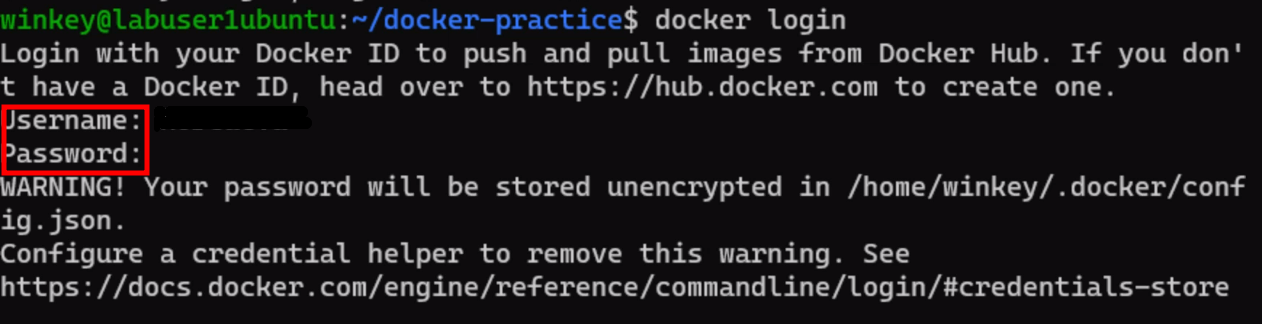

- 도커 태깅

In [ ]:
docker tag my-image:v1.0.0 jhportfolio1/my-image:v1.0.0

- 도커에 푸시

In [ ]:
docker push jhportfolio/my-image:v1.0.0

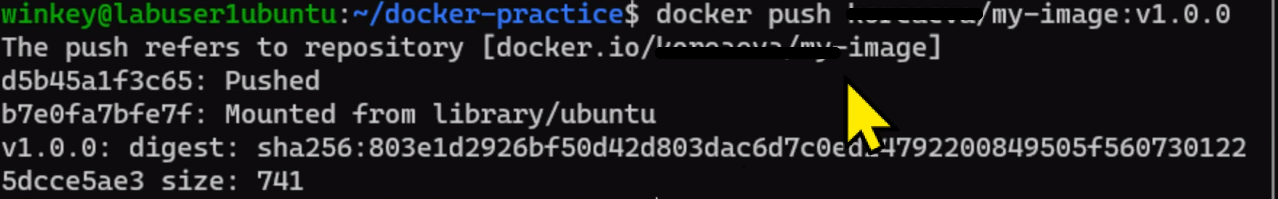

>## 3) Kubernetes 쿠버네티스

- 컨테이너를 오케스트레이션 하는 도구
- 여러 클러스터의 호스트 간 애플리케이션 컨테이너 배치, 스케일링, 운영 자동화 하기 위한 플랫폼